1.IMPORT DATASETS,LIBRARIES




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
sns.set(style="white",color_codes=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#importing the datasets and display the first 5 values
df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#describe the entire dataset
#statistical summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
#checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#obtaining the shape
#that is checking the rows and columns of dataset
df.shape

(5000, 14)

In [7]:
#checking the existence of null values in each column
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

2.CLEAN THE DATA FOR ANY OF THE VARIABLES IF NECESSARY


In [8]:
#checking the correlation of age and experience
experience=df['Experience']
age=df['Age']
correlation=experience.corr(age)
correlation

0.9942148569683321

In [9]:
#drop experience column 
#drop ID column since it does not make any relation in accessing loans
#both experience and ID columns are noise
df=df.drop(['ID','Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


3.EDA


In [10]:
#finding unique data in each column
df.apply(lambda x: len(x.unique()))

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [11]:
#dropping ZIP code
df.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [12]:
#finding the no.of people with zero mortgage
df[df['Mortgage']==0]['Mortgage'].count()

3462

In [13]:
#finding no.of people with zero credit card spending per month
df[df['CCAvg']==0]['CCAvg'].count()

106

Finding the values of all categorical columns


In [14]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [15]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [16]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [17]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [18]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [19]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Univariate analysis

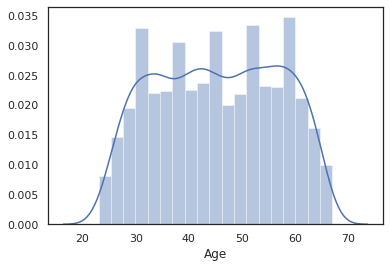

In [20]:
#distribution of age
#symmetric distribution
sns.distplot(df.Age)

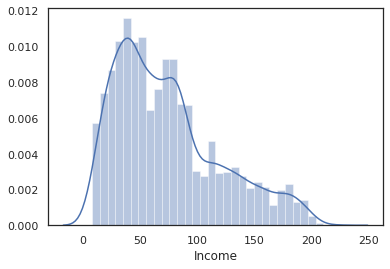

In [21]:
#distribution of income
#right skewed distribution
sns.distplot(df.Income)

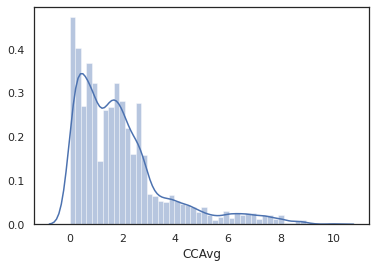

In [22]:
#distribution of ccavg
#right skewed distribution
sns.distplot(df.CCAvg)

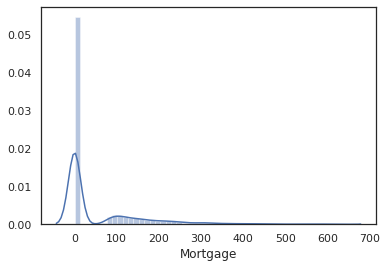

In [23]:
#distribution of mortgage
#highly right skewed distribution
sns.distplot(df.Mortgage)

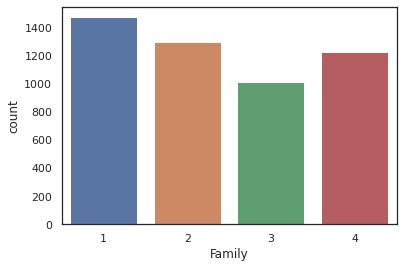

In [24]:
#distribution of family
sns.countplot(df.Family)

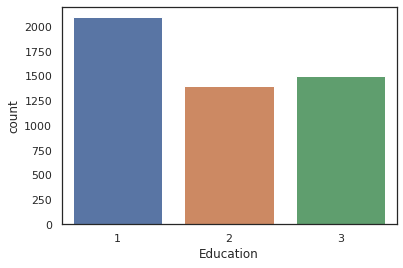

In [25]:
#distribution of education
sns.countplot(df.Education)

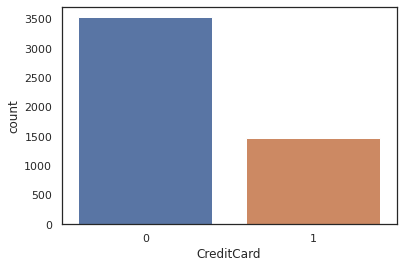

In [26]:
#distribution of creditcard
sns.countplot(df.CreditCard)

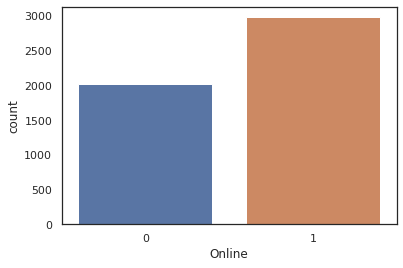

In [27]:
#distribution of online
sns.countplot(df.Online)

MULTIVARIATE ANALYSIS

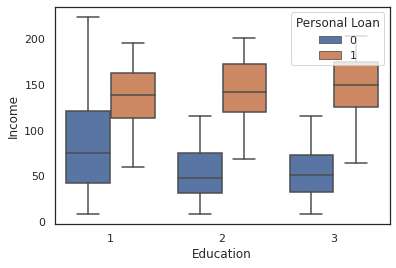

In [28]:
#influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

OBSERVATION:It is observed that the customers whose education level is 1 is having more income.However customers who has taken the personal loan have the same income levels.

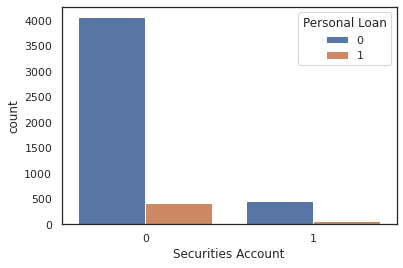

In [29]:
sns.countplot(x='Securities Account',data=df,hue='Personal Loan')

OBSERVATION:It is observed that majority of customers who does not have loan have securities account.

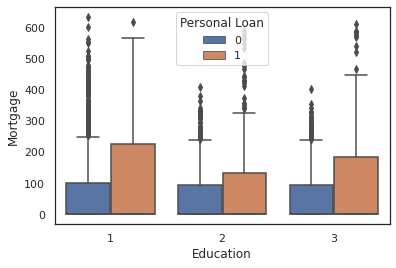

In [30]:
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=df)

OBSERVATION:It seems that customer who do not have personal loan and customer who has personal loan have high mortgage.

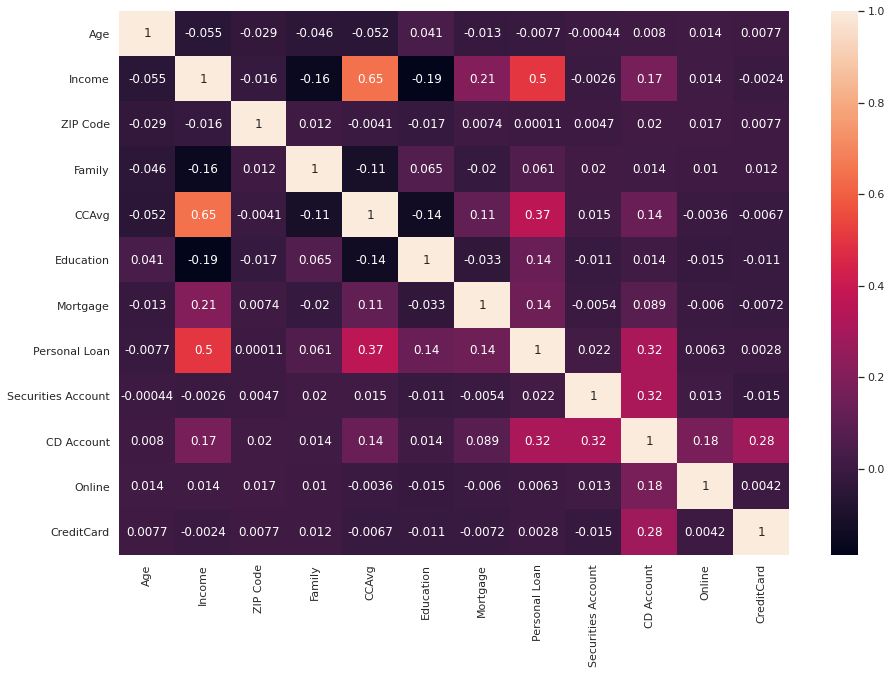

In [31]:
#correlation matrix
plot.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

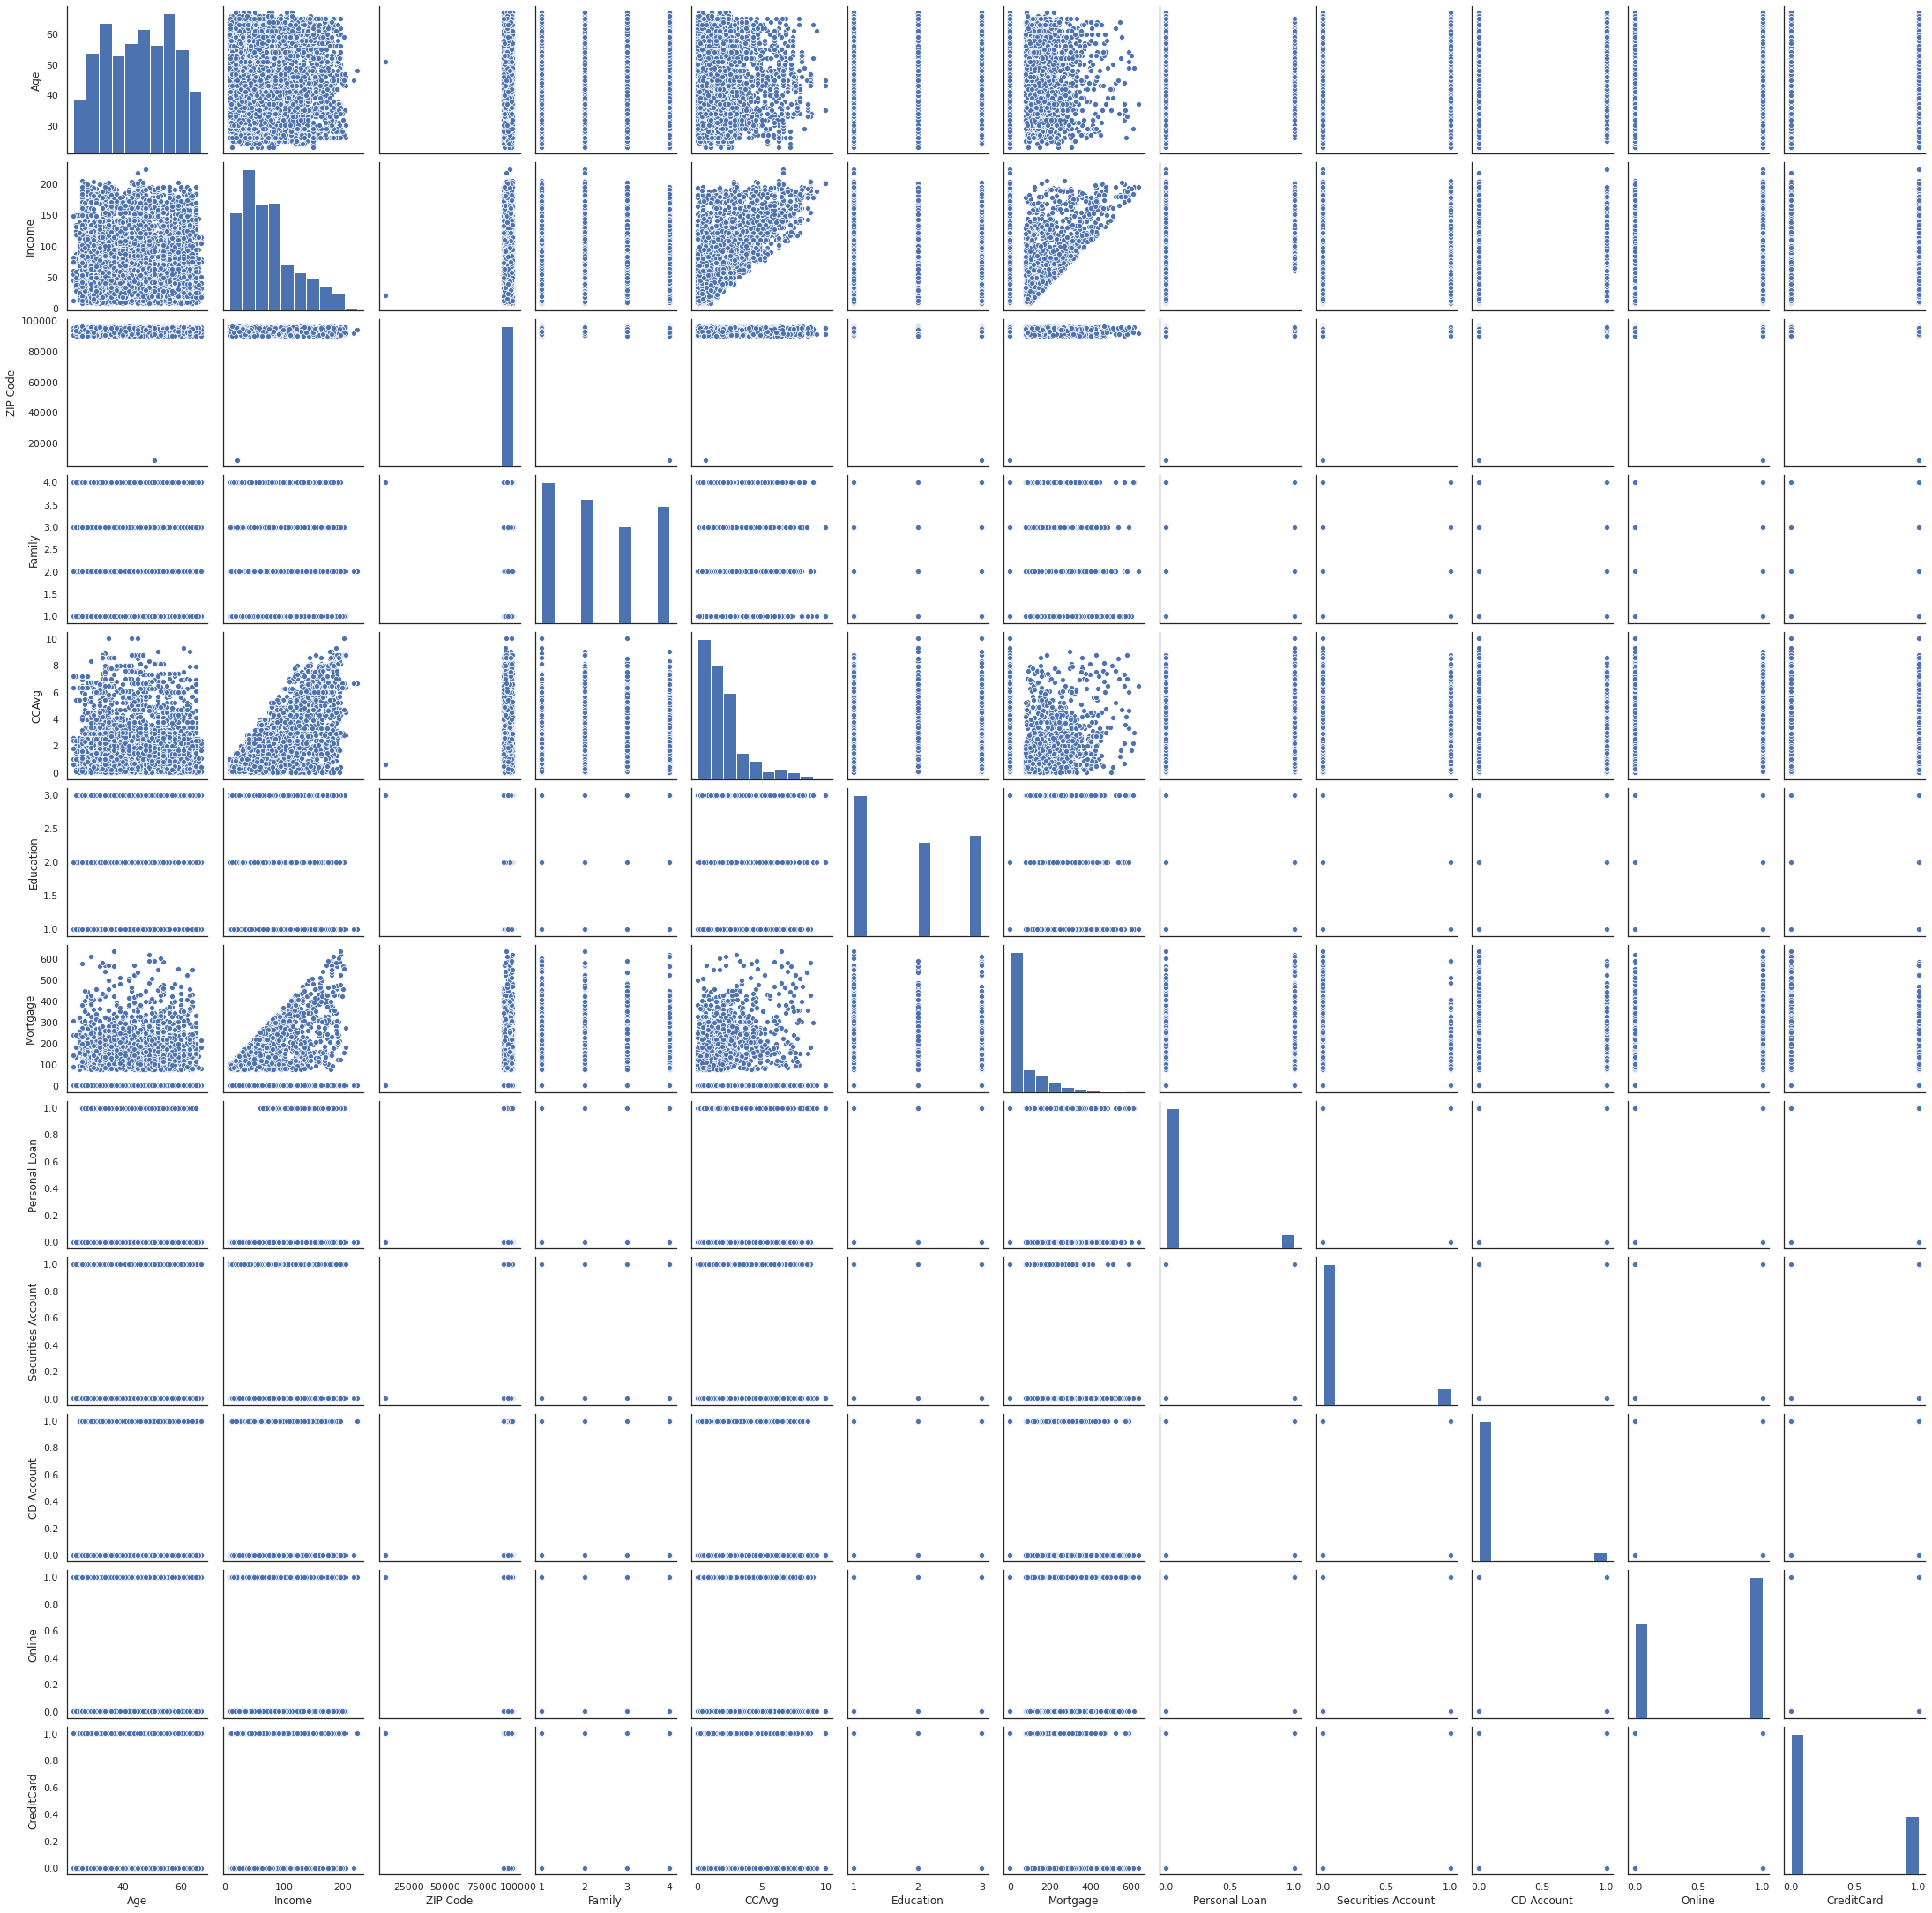

In [32]:
sns.pairplot(df)

In [33]:
data_X = df.loc[:,df.columns !='Personal Loan']
data_Y = df[['Personal Loan']]

4.APPLY NECESSARY TRANSFORMATIONS FOR THE FEATURE VARIABLES

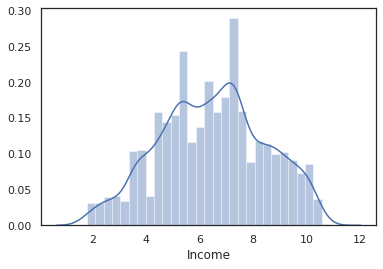

In [39]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox',standardize=False)
pt.fit(data_X['Income'].values.reshape(-1,1))
data_X['Income']=pt.transform(data_X['Income'].values.reshape(-1,1))
sns.distplot(data_X['Income'])

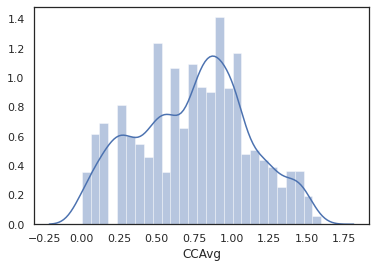

In [40]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
data_X['CCAvg']=pt.transform(data_X['CCAvg'].values.reshape(-1,1))
sns.distplot(data_X['CCAvg'])

In [41]:
data_X["Mortgage_Int"] = pd.cut(data_X['Mortgage'],
                                bins = [0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
data_X.drop('Mortgage',axis=1,inplace=True)

KeyError: ignored

In [42]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,5.745614,91107,4,0.795211,1,1,0,0,0,0
1,45,4.787285,90089,3,0.767726,1,1,0,0,0,0
2,39,2.344510,94720,1,0.604072,1,0,0,0,0,0
3,35,7.903440,94112,1,1.026918,2,0,0,0,0,0
4,35,5.514030,91330,4,0.604072,2,0,0,0,1,0


5.Splitting the data

In [43]:
#splitting the data into training and testing set in the ratio 70:30
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X,data_Y, test_size=0.3, stratify=data_Y, random_state=0)

In [48]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train_X = sc_X.fit_transform(train_X)
test_X = sc_X.fit_transform(test_X)
train_X,test_X

(array([[ 0.50989681, -1.26363452,  0.50279974, ...,  0.83854816,
          1.52960605, -0.47490853],
        [ 1.64360991, -0.80695585, -1.27990994, ..., -1.19253735,
         -0.65376311, -0.47490853],
        [ 0.59710551, -0.95879394,  0.77760654, ...,  0.83854816,
          1.52960605, -0.47490853],
        ...,
        [ 1.55640121, -0.91953679,  0.81074241, ..., -1.19253735,
         -0.65376311, -0.47490853],
        [-0.88544239, -0.27668662,  1.08378196, ..., -1.19253735,
          1.52960605, -0.47490853],
        [-1.32148589,  1.08600854,  1.07892203, ...,  0.83854816,
         -0.65376311, -0.47490853]]),
 array([[-1.02896547,  1.79645428, -0.06018388, ..., -1.27552743,
         -0.62567218, -0.48867186],
        [ 0.80680777,  0.36767476, -0.57552547, ..., -1.27552743,
         -0.62567218, -0.48867186],
        [ 0.19488336,  1.14941815,  0.84738992, ..., -1.27552743,
         -0.62567218, -0.48867186],
        ...,
        [ 0.63197222, -0.99666038, -0.87213319, ..., -

6.Applying Logistic regression model

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic_regression =LogisticRegression()
logistic_regression.fit(train_X,train_Y)
expected_test=logistic_regression.predict(test_X)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
expected_test

array([1, 0, 0, ..., 0, 0, 0])

In [149]:
expected_train=logistic_regression.predict(train_X)

In [150]:
expected_train

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
model=LogisticRegression()
model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
#accuracy of train
model.score(train_X,train_Y)

0.9568571428571429

In [153]:
#accuracy of test
model.score(test_X,test_Y)

0.9546666666666667

7.Printing the metrics related to model performance

In [154]:
print(metrics.confusion_matrix(test_Y,expected_test))

[[1339   17]
 [  51   93]]


In [155]:
print(metrics.confusion_matrix(train_Y,expected_train))

[[3126   38]
 [ 113  223]]


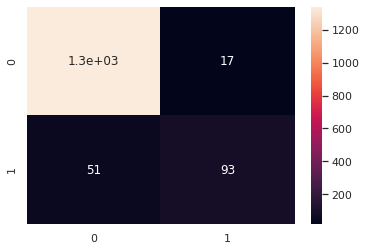

In [156]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white',color_codes=True)
cm1=confusion_matrix(test_Y,expected_test)
sns.heatmap(cm1,annot=True)

8.Other classification algorithms and their performances

RANDOM FOREST 

In [158]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=500,random_state=0,max_depth=8)

In [159]:
model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [160]:
expected_test=model.predict(test_X)

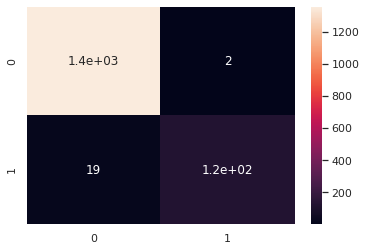

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white',color_codes=True)
cm2=confusion_matrix(test_Y,expected_test)
sns.heatmap(cm2,annot=True)

In [165]:
#testing test accuracy
model.score(test_X,test_Y)

0.986

In [85]:
#testing train accuracy
model.score(train_X,train_Y)

0.9948571428571429

DECISION TREE CLASSIFIER

In [167]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0,max_depth=8)

In [168]:
model.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [169]:
#testing test accuracy
model.score(test_X,test_Y)

0.978

In [170]:
#testing train accuracy
model.score(train_X,train_Y)

0.996

In [171]:
expected_test=model.predict(test_X)

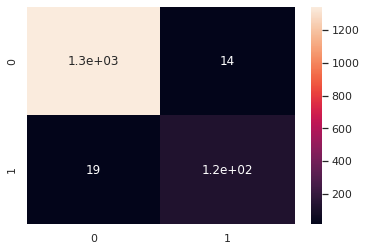

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white',color_codes=True)
cm3=confusion_matrix(test_Y,expected_test)
sns.heatmap(cm3,annot=True)

NAIVE BAYES

In [177]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()
naive_model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
expected_test=naive_model.predict(test_X)

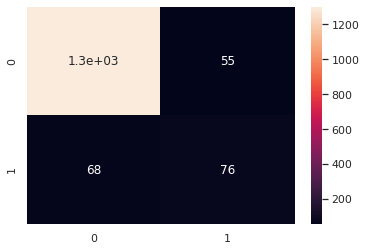

In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white',color_codes=True)
cm4=confusion_matrix(test_Y,expected_test)
sns.heatmap(cm4,annot=True)

In [181]:
#testing test accuracy
naive_model.score(test_X,test_Y)

0.918

In [182]:
#testing train accuracy
naive_model.score(train_X,train_Y)

0.9085714285714286

KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier
neigh_model=KNeighborsClassifier(n_neighbors=3)
neigh_model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [186]:
expected_test=neigh_model.predict(test_X)

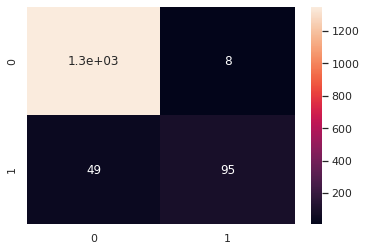

In [187]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white',color_codes=True)
cm5=confusion_matrix(test_Y,expected_test)
sns.heatmap(cm5,annot=True)

In [188]:
#testing test accuracy
neigh_model.score(test_X,test_Y)

0.962

In [135]:
#testing train accuracy
neigh_model.score(train_X,train_Y)

0.9737142857142858

NEURAL NETWORK

In [136]:
from sklearn.neural_network import MLPClassifier
mp_model=MLPClassifier(max_iter=500)
mp_model.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [137]:
expected_test=mp_model.predict(test_X)

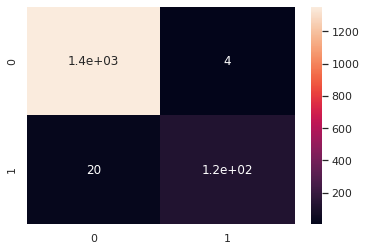

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white',color_codes='True')
cm=confusion_matrix(test_Y,expected_test)
sns.heatmap(cm,annot=True)

In [139]:
#testing test accuracy
mp_model.score(test_X,test_Y)

0.984

In [140]:
#testing train accuracy
mp_model.score(train_X,train_Y)

0.9971428571428571

9.Business understanding of the model

The case is,the bank has a customers data with various characteristics of the customers.

THE GOAL IS:


*   To sell more personal loan products to bank customers.





APPROACH:we made the simple step-by-step analysis of customer's characteristics to identify patterns to effectively choose the subset of customers who have a higher probability to buy a new product "personal loan" from the bank.

First,we imported various libraries that are necessary and our data.


1)Later we found that age and experience are highly correlated and dropped experience column.

2)ID and ZIP code was also dropped since both does not contribute to the personal loan credit.

3)The Income and CCAvg columns were right skewed.Applied power transform to normalize them.BOX-COX or YEO-JOHNSON can be used.Here I applied both.

4)The mortgage column was also highly right skewed.As it was discrete,instead of applying power transform,binning was used

5)Then various algorithms were used to predict the likelihood of a customer buying personal loans.



LOGISTIC REGRESSION

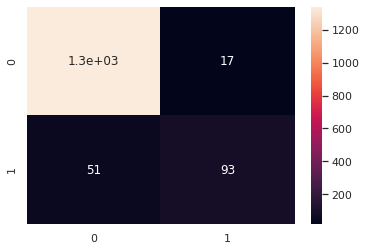

In [157]:
sns.heatmap(cm1,annot=True)

RANDOM FOREST

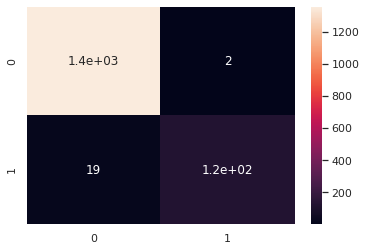

In [164]:
sns.heatmap(cm2,annot=True)

In [166]:
#ACCURACY
model.score(test_X,test_Y)

0.986

DECISION TREE

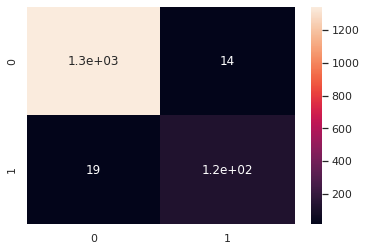

In [175]:
sns.heatmap(cm3,annot=True)

In [176]:
#ACCURACY
model.score(test_X,test_Y)

0.978

NAIVE MODEL

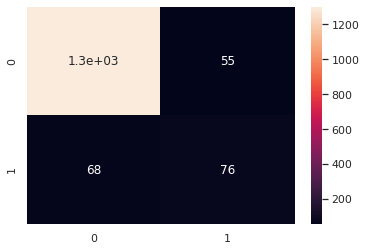

In [183]:
sns.heatmap(cm4,annot=True)

In [184]:
# ACCURACY
naive_model.score(test_X,test_Y)

0.918

KNN

In [ ]:
sn